### Exploratory Analysis

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading in the dataset 
df = pd.read_csv('categorized_ecommerce.csv', index_col=0, header=0, parse_dates=True, infer_datetime_format=True)
df.head(10)

,Description,Categories,Quantity,UnitPrice,Total,Country
InvoiceDate,,,,,,
2010-12-01,WHITE HANGING HEART T-LIGHT HOLDER,HOME AND OFFICE DECOR,6,2.55,15.3,UNITED KINGDOM
2010-12-01,WHITE METAL LANTERN,HOME AND OFFICE DECOR,6,3.39,20.3,UNITED KINGDOM
2010-12-01,CREAM CUPID HEARTS COAT HANGER,HOME AND OFFICE DECOR,8,2.75,22.0,UNITED KINGDOM
2010-12-01,KNITTED UNION FLAG HOT WATER BOTTLE,PERSONAL,6,3.39,20.3,UNITED KINGDOM
2010-12-01,RED WOOLLY HOTTIE WHITE HEART.,HOME AND OFFICE DECOR,6,3.39,20.3,UNITED KINGDOM
2010-12-01,SET 7 BABUSHKA NESTING BOXES,GIFTS,2,7.65,15.3,UNITED KINGDOM
2010-12-01,GLASS STAR FROSTED T-LIGHT HOLDER,HOME AND OFFICE DECOR,6,4.25,25.5,UNITED KINGDOM
2010-12-01,HAND WARMER UNION JACK,PERSONAL,6,1.85,11.1,UNITED KINGDOM
2010-12-01,HAND WARMER RED POLKA DOT,HOME AND OFFICE DECOR,6,1.85,11.1,UNITED KINGDOM


In [3]:
#Resampling the dataset to weekly frequency
df = df.resample('W').sum()

In [4]:
#viewing the columns
df.columns

Index(['Quantity', 'UnitPrice', 'Total'], dtype='object')

In [5]:
#Quick peep of what the dataset entails
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2010-12-05 to 2011-12-11
Freq: W-SUN
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   54 non-null     int64  
 1   UnitPrice  54 non-null     float64
 2   Total      54 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


In [6]:
#viewing the number of columns and rows
df.shape

(54, 3)

In [7]:
#calculating the number of days in the dataset
min_date = df.index.min()
max_date =  df.index.max()
range = max_date - min_date

In [8]:
print('The range for the dataset is', range)

The range for the dataset is 371 days 00:00:00


In [9]:
#A summary of the descriptive statistics of the dataset
round(df.describe(), 1)

,Quantity,UnitPrice,Total
count,54.0,54.0,54.0
mean,98482.0,36539.0,185214.6
std,37878.0,15614.9,76983.5
min,0.0,0.0,0.0
25%,75125.5,27027.9,133645.4
50%,94502.0,31521.0,172724.6
75%,108882.8,40150.2,210209.0
max,183592.0,75538.4,379554.7


### There are a few noteworthy points to highlight about the dataset. Firstly, the dataset exhibits a right-skewed distribution. How can we determine this from the summary statistics? Well, when the mean value of a dataset is greater than the median value, it indicates that the mean is shifted towards the right side of a hypothetical histogram if we were to plot it. This observation implies that the tail of the dataset extends towards the right side of the histogram.

### Additionally, it is worth noting that for all the numeric columns in the dataset, the mean values are consistently higher than the corresponding median values.

In [10]:
#Removing values that have Quantity to be less than 0
df = df.query('Quantity>0')

In [11]:
df.head()

,Quantity,UnitPrice,Total
InvoiceDate,,,
2010-12-05,79920,38220.93,180874.2
2010-12-12,119760,74706.79,308525.8
2010-12-19,104863,48256.19,208103.9
2010-12-26,38335,24721.53,87777.3
2011-01-09,75172,25475.59,127629.1


In [12]:
## Viewing the descriptive stats for the numeric columns of the dataset
round(df.describe(), 1)

,Quantity,UnitPrice,Total
count,53.0,53.0,53.0
mean,100340.2,37228.4,188709.2
std,35669.3,14911.6,73268.5
min,38335.0,17988.1,83283.6
25%,75172.0,27164.6,135362.3
50%,96810.0,31718.3,173718.5
75%,109307.0,40591.7,210910.7
max,183592.0,75538.4,379554.7


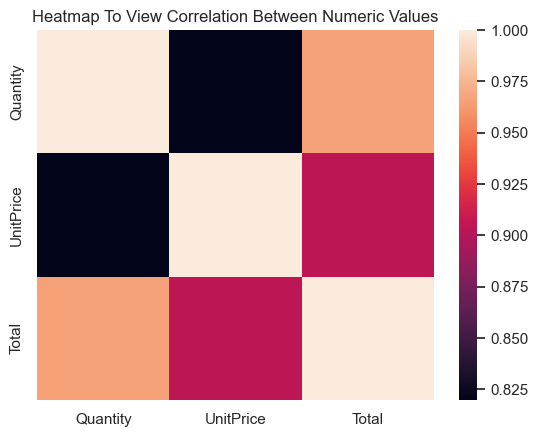

In [13]:
#plotting a heatmap to view the correlation amongst numeric columns
sns.heatmap(df.corr())
plt.title('Heatmap To View Correlation Between Numeric Values')
plt.show()

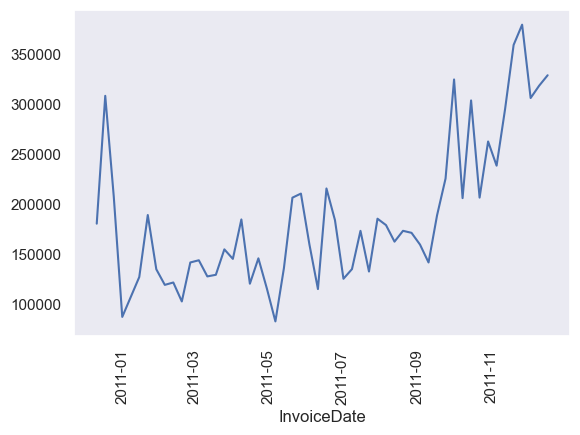

In [14]:
#A line plot to view the trend in the dataset for the numeric values
df['Total'].plot()
plt.xticks(rotation=90)
plt.show()

### Regarding the dataset's trend, a clear upward trend can be observed simply by examining the graph. There doesn't appear to be any significant seasonality, where specific periods with consistent time intervals affect the shop's sales. However, it's important to note that since the dataset covers a little over a year, it may not provide a comprehensive view of this aspect. Nevertheless, one notable observation is that the trend starts at a high point in the beginning and also ends at a high point. The data includes holiday periods, specifically Christmas and New Year, which are known for generating high sales for the shop. Further analysis will be provided on this topic. 

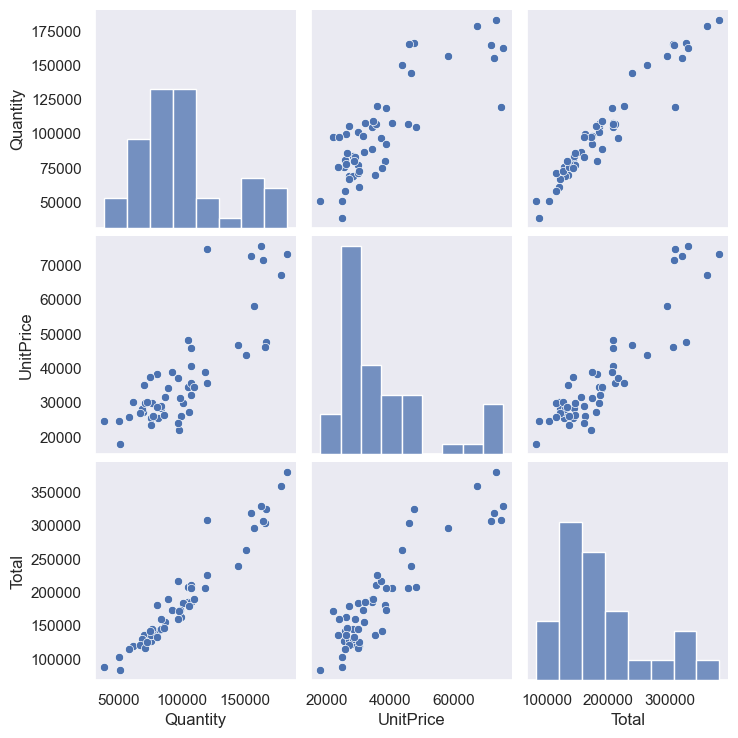

In [15]:
# Viewing a plot to show both histograms and scatter plota for the numeric values
sns.pairplot(df)
plt.xlabel('Values')
plt.ylabel('Quantity                     UnitPrice                      Total')
plt.show()

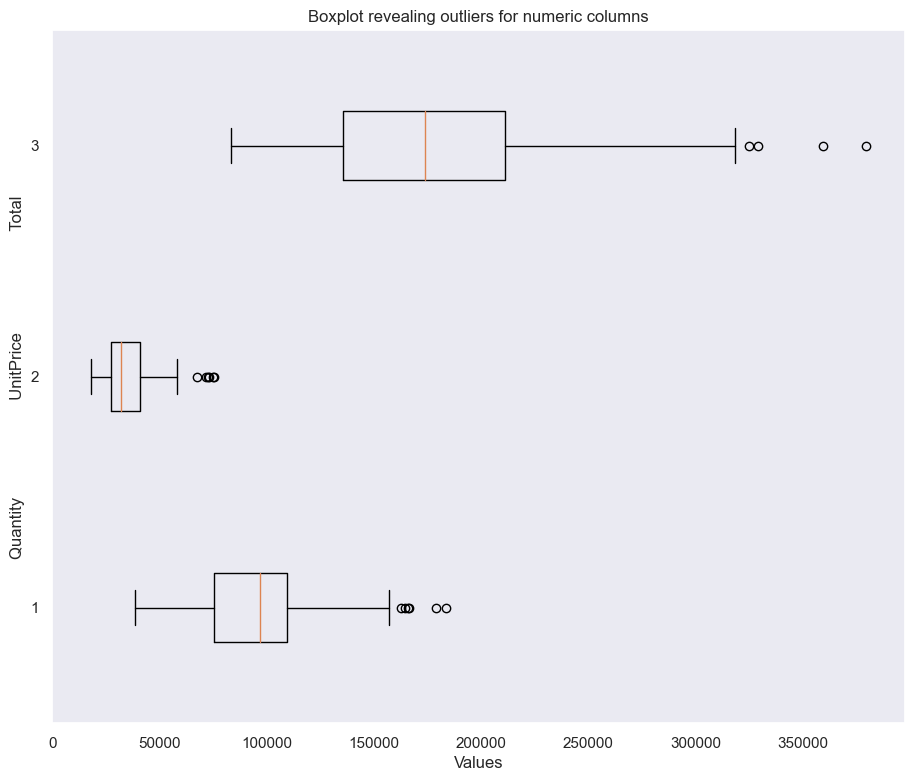

In [16]:
plt.figure(figsize=(11, 9))
plt.boxplot(df, vert=False)
plt.xlabel('Values')
plt.ylabel('Quantity                     UnitPrice                      Total')
plt.title('Boxplot revealing outliers for numeric columns')
plt.show()

In [17]:
df = df.query('Total<280000')

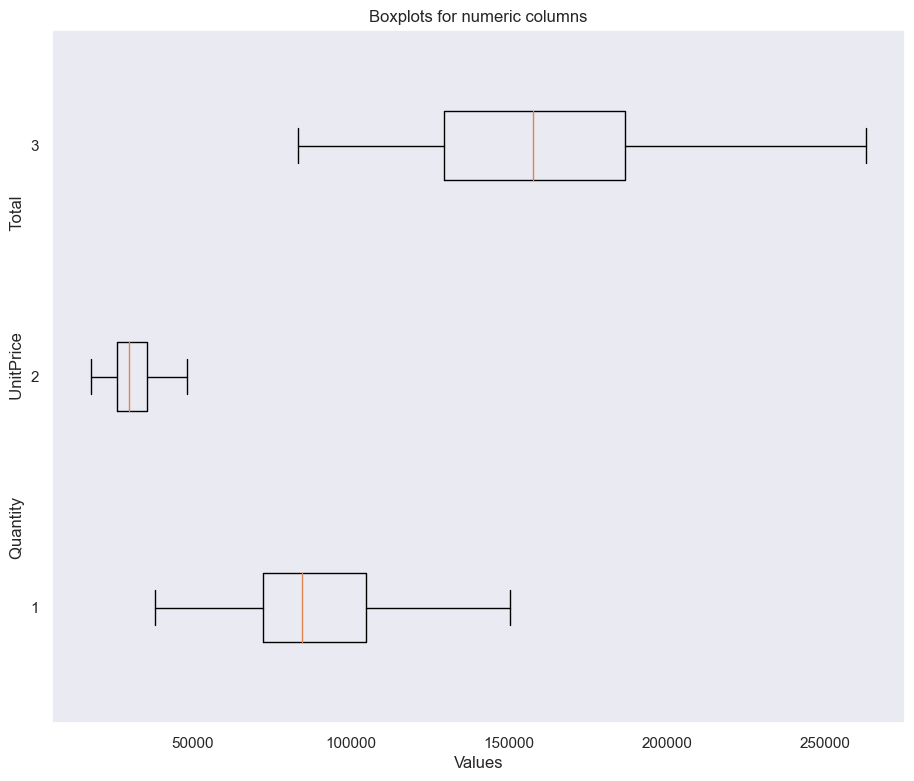

In [18]:
plt.figure(figsize=(11, 9))
plt.boxplot(df, vert=False)
plt.xlabel('Values')
plt.ylabel('Quantity                     UnitPrice                      Total')
plt.title('Boxplots for numeric columns')
plt.show()

### In the previous boxplot, it was evident that the dataset contained outliers, represented by small circles in the graph. However, these outliers have been addressed and removed, as demonstrated in the updated boxplot. The new boxplot provides us with several notable observations.

### One notable observation is that the columns in the dataset exhibit right-skewedness. This can be observed in the first plot, where the length of the right whisker is longer than the left whisker, indicating the presence of right-skewed distribution. Similar observations can be made for the other boxes in the boxplot.

### In terms of the range of the dataset, the 'Total' column exhibits the widest range, spanning from 100,000 to 250,000. On the other hand, the 'Unitprice' column has the smallest range, ranging from approximately 1,500 to just over 5,000. Finally, the last column ranges from slightly below 5,000 to slightly above 150,000.

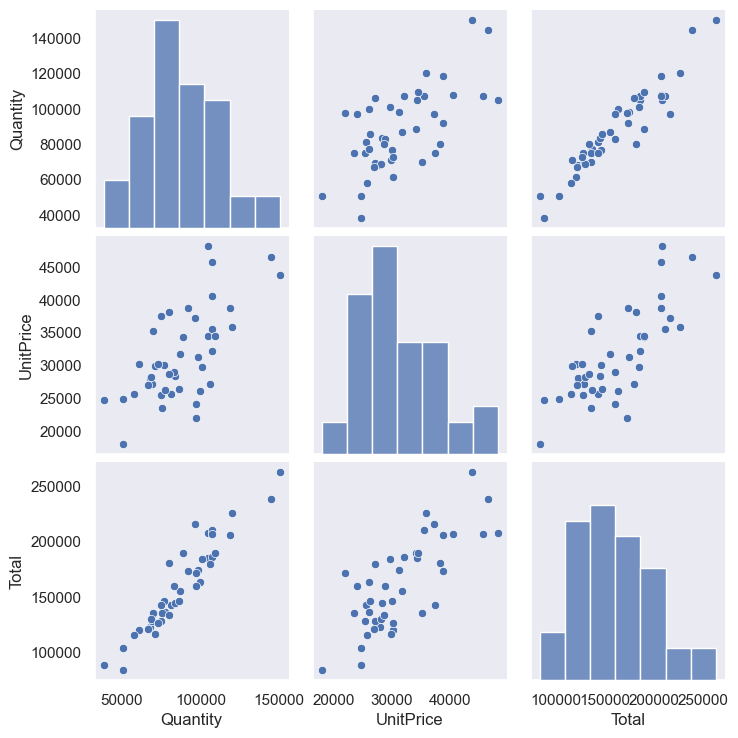

In [19]:
sns.pairplot(df)
plt.xticks(rotation=90)
plt.show()

~~~SQL
--Viewing countries with the highest and lowest sales
SELECT 
    Country,
	COUNT(Categories) AS count_of_items,
	CONCAT(ROUND((COUNT(Categories) * 100.0 / (SELECT COUNT(Categories) FROM sql_ecommerce)), 4), ' ', '%') AS count_percentage,
    ROUND(SUM(Total), 0) AS total_sales,
    CONCAT(SUM(Total) / (SELECT SUM(Total) FROM sql_ecommerce) * 100.0, ' ', '%') AS sales_percentage
FROM
    sql_ecommerce
GROUP BY
    Country
ORDER BY total_sales DESC;

~~~

| Country              | count_of_items | count_percentage       | total_sales | sales_percentage     |
|----------------------|----------------|------------------------|-------------|----------------------|
| UNITED KINGDOM       | 492,018        | 91.677600000000%       | 8,505,593   | 85.0926%             |
| NETHERLANDS          | 2,329          | 0.434000000000%        | 283,346     | 2.83468%             |
| IRELAND              | 8,168          | 1.521900000000%        | 264,971     | 2.65085%             |
| GERMANY              | 9,090          | 1.693700000000%        | 200,756     | 2.00843%             |
| FRANCE               | 8,217          | 1.531100000000%        | 182,082     | 1.82161%             |
| AUSTRALIA            | 1,257          | 0.234200000000%        | 136,988     | 1.37047%             |
| SWITZERLAND          | 1,969          | 0.366900000000%        | 52,506      | 0.525282%            |
| SPAIN                | 2,465          | 0.459300000000%        | 51,731      | 0.51753%             |
| BELGIUM              | 1,971          | 0.367300000000%        | 36,663      | 0.36679%             |
| JAPAN                | 355            | 0.066100000000%        | 35,418      | 0.354333%            |
| SWEDEN               | 437            | 0.081400000000%        | 35,176      | 0.351916%            |
| NORWAY               | 1,060          | 0.197500000000%        | 32,293      | 0.323064%            |
| PORTUGAL             | 1,473          | 0.274500000000%        | 26,840      | 0.268515%            |
| CHANNEL ISLANDS      | 756            | 0.140900000000%        | 20,087      | 0.200954%            |
| FINLAND              | 652            | 0.121500000000%        | 18,294      | 0.183021%            |
| DENMARK              | 373            | 0.069500000000%        | 18,002      | 0.180099%            |
| ITALY                | 783            | 0.145900000000%        | 15,276      | 0.152828%            |
| CYPRUS               | 618            | 0.115200000000%        | 12,931      | 0.129366%            |
| HONG KONG            | 279            | 0.052000000000%        | 9,933       | 0.0993708%           |
| SINGAPORE            | 214            | 0.039900000000%        | 9,090       | 0.0909402%           |
| AUSTRIA              | 387            | 0.072100000000%        | 8,697       | 0.0870115%           |
| ISRAEL               | 297            | 0.055300000000%        | 7,908       | 0.0791151%           |
| POLAND               | 336            | 0.062600000000%        | 6,853       | 0.0685625%           |
| GREECE               | 142            | 0.026500000000%        | 4,426       | 0.0442751%           |
| ICELAND              | 182            | 0.033900000000%        | 4,310       | 0.0431186%           |
| CANADA               | 148            | 0.027600000000%        | 3,096       | 0.0309733%           |
| MALTA                | 123            | 0.022900000000%        | 1,980       | 0.0198085%           |
| UNITED ARAB EMIRATES | 67             | 0.012500000000%        | 1,865       | 0.018654%            |
| USA                  | 291            | 0.054200000000%        | 1,731       | 0.0173175%           |
| LEBANON              | 45             | 0.008400000000%        | 1,694       | 0.0169473%           |
| LITHUANIA            | 35             | 0.006500000000%        | 1,661       | 0.0166182%           |
| BRAZIL               | 32             | 0.006000000000%        | 1,143       | 0.0114389%           |
| SOUTH AFRICA         | 57             | 0.010600000000%        | 1,002       | 0.0100263%           |
| CZECH REPUBLIC       | 28             | 0.005200000000%        | 672         | 0.00671889%          |
| BAHRAIN              | 19             | 0.003500000000%        | 548         | 0.00548636%          |
| SAUDI ARABIA         | 10             | 0.001900000000%        | 131         | 0.00131156%          |


### The table presented above provides insights into the sales distribution across different countries. It reveals that the United Kingdom, which is the country where the shop is located, generates a significant portion of the company's sales, contributing approximately 85% of the total sales. This dominance is also reflected in the count of items sold, where the United Kingdom accounts for 91% of the items sold.

### In contrast, Saudi Arabia is positioned at the bottom of the list, with only 10 items associated with its name, representing a mere 0.001312% of the company's total sales. This indicates a relatively smaller contribution from Saudi Arabia compared to other countries in terms of both sales value and item count.

~~~SQL

--Counting the total sales for each category
SELECT  
	Categories AS Category, 
	COUNT(Categories) AS count_of_items,
	ROUND(SUM(Total), 1) AS Total_sales_for_category, 
	CONCAT(ROUND((COUNT(Categories) * 100.0 / (SELECT COUNT(Categories) FROM sql_ecommerce)), 4), ' ', '%') AS count_percentage,
	RANK() OVER (ORDER BY COUNT(Categories) DESC) AS category_rank
FROM sql_ecommerce
GROUP BY Categories
ORDER BY Total_sales_for_category DESC;

~~~

| Category              | count_of_items | Total_sales_for_category | count_percentage       | category_rank |
|-----------------------|----------------|-------------------------|------------------------|---------------|
| HOME AND OFFICE DECOR | 333,656        | 6,264,763.7             | 62.170000000000%       | 1             |
| GIFTS                 | 135,995        | 2,632,357.4             | 25.339900000000%       | 2             |
| SIGNS                 | 32,027         | 553,786.8               | 5.967600000000%        | 3             |
| PERSONAL              | 9,230          | 250,691.1               | 1.719800000000%        | 5             |
| STATIONARY            | 19,645         | 171,851.9               | 3.660400000000%        | 4             |
| JEWELRY               | 6,130          | 122,242.9               | 1.142200000000%        | 6             |


### When it comes to the category section, the Home And Office Decor category takes the lead. With a count of items surpassing three hundred thousand and total sales exceeding six million pounds, it accounts for approximately 62% of the total items sold, making it the top category in terms of both count and sales.




### The jewelry category is trailing behind other categories. With a count of items slightly over six thousand and total sales around one hundred and twenty thousand pounds, it represents only one percent of the total items sold. Compared to other categories, the jewelry category has a relatively smaller presence in terms of both count and sales.

~~~SQL
--Viewing sales by month
SELECT
	sub.Months, 
	sub.Total_for_month, 
	COALESCE(ROUND(Total_for_month - LAG(Total_for_month) OVER (ORDER BY Months), 2), 0) AS MoM_change, 
	CONCAT(ROUND((COALESCE(ROUND(Total_for_month - LAG(Total_for_month) OVER (ORDER BY Months), 2), 0) / Total_for_month) *100.0, 2), ' ', '%') AS Pct_change
FROM (
SELECT
    MONTH(InvoiceDate) AS Months,
    ROUND(SUM(Total), 1) AS Total_for_month
FROM
    sql_ecommerce
GROUP BY
    MONTH(InvoiceDate)
	) sub
ORDER BY sub.Months 
~~~

| Months | Total_for_month | MoM_change | Pct_change |
|--------|----------------|------------|------------|
| 1      | 594,246.5      | 0          | 0%         |
| 2      | 510,514.6      | -83,731.9  | -16.4%     |
| 3      | 692,718.9      | 182,204.3  | 26.3%      |
| 4      | 489,987.1      | -202,731.8 | -41.37%    |
| 5      | 741,494.4      | 251,507.3  | 33.92%     |
| 6      | 736,411.8      | -5,082.6   | -0.69%     |
| 7      | 689,032.2      | -47,379.6  | -6.88%     |
| 8      | 715,442.7      | 26,410.5   | 3.69%      |
| 9      | 1,028,942.9    | 313,500.2  | 30.47%     |
| 10     | 1,081,163.6    | 52,220.7   | 4.83%      |
| 11     | 1,469,209.1    | 388,045.5  | 26.41%     |
| 12     | 1,246,530      | -222,679.1 | -17.86%    |


In [20]:
##Turning the above into a pandas dataframe
sales_changes = {
    'Months': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Total_for_months': [594246.5, 510514.6, 692718.9, 489987.1, 741494.4, 736411.8, 689032.2, 715442.7, 1028942.9, 1081163.6, 1469209.1, 1246530],
    'MoM_change': [0, -83731.9, 182204.3, -202731.8, 251507.3, -5082.6, -47379.6, 26410.5, 313500.2, 52220.7, 388045.5, -222679.1],
    'Pct_change': ['0', '-16.4', '26.3', '-41.37', '33.92', '-0.69', '-6.88', '3.69', '30.47', '4.83', '26.41', '-17.86']
}
sales_change = pd.DataFrame(sales_changes)
sales_change = sales_change.set_index(['Months'])

print(sales_change)

        Total_for_months  MoM_change Pct_change
Months                                         
1               594246.5         0.0          0
2               510514.6    -83731.9      -16.4
3               692718.9    182204.3       26.3
4               489987.1   -202731.8     -41.37
5               741494.4    251507.3      33.92
6               736411.8     -5082.6      -0.69
7               689032.2    -47379.6      -6.88
8               715442.7     26410.5       3.69
9              1028942.9    313500.2      30.47
10             1081163.6     52220.7       4.83
11             1469209.1    388045.5      26.41
12             1246530.0   -222679.1     -17.86


In [21]:
sales_MoM = pd.DataFrame(sales_change)

In [22]:
sales_MoM

,Total_for_months,MoM_change,Pct_change
Months,,,
1,594246.5,0.0,0
2,510514.6,-83731.9,-16.4
3,692718.9,182204.3,26.3
4,489987.1,-202731.8,-41.37
5,741494.4,251507.3,33.92
6,736411.8,-5082.6,-0.69
7,689032.2,-47379.6,-6.88
8,715442.7,26410.5,3.69
9,1028942.9,313500.2,30.47


In [23]:
## Quick peep of what the table entails
sales_MoM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_for_months  12 non-null     float64
 1   MoM_change        12 non-null     float64
 2   Pct_change        12 non-null     object 
dtypes: float64(2), object(1)
memory usage: 384.0+ bytes


In [24]:
##Separating the percent change into a different dataframe
sales_MoM['Pct_change']

Months
1          0
2      -16.4
3       26.3
4     -41.37
5      33.92
6      -0.69
7      -6.88
8       3.69
9      30.47
10      4.83
11     26.41
12    -17.86
Name: Pct_change, dtype: object

In [25]:
## Creating the dataframe with sales_Mom['Pct_change']
Pct_change = pd.DataFrame(sales_MoM['Pct_change'])

In [26]:
## Viewing dataframe
Pct_change

,Pct_change
Months,
1,0
2,-16.4
3,26.3
4,-41.37
5,33.92
6,-0.69
7,-6.88
8,3.69
9,30.47


In [27]:
Pct_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pct_change  12 non-null     object
dtypes: object(1)
memory usage: 192.0+ bytes


In [28]:
Pct_change = Pct_change['Pct_change'].astype(float)

In [29]:
Pct_change

Months
1      0.00
2    -16.40
3     26.30
4    -41.37
5     33.92
6     -0.69
7     -6.88
8      3.69
9     30.47
10     4.83
11    26.41
12   -17.86
Name: Pct_change, dtype: float64

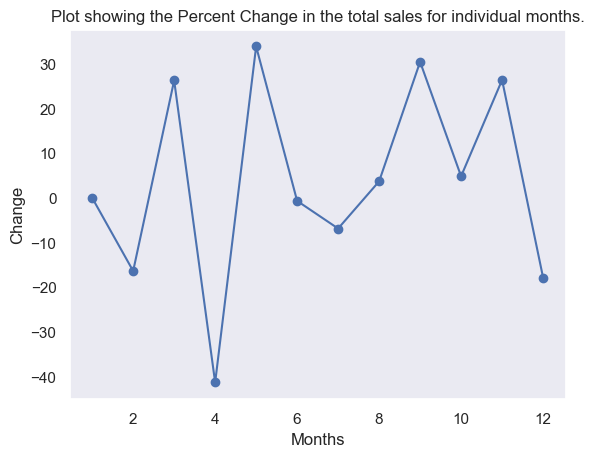

In [30]:
Pct_change.plot(marker='o')
plt.xlabel('Months')
plt.ylabel('Change')
plt.title('Plot showing the Percent Change in the total sales for individual months.')
plt.show()

### Sales haven't been all cozy for the store. The greatest drop was from May to April which was a 41% drop and the highest point was the month after that which was 33% increase from the last. 

# Conclusions

### 1. Right-skewed distribution: The dataset exhibits a right-skewed distribution, as indicated by the mean being greater than the median for all numeric columns. This suggests that the data has a tail extending towards the higher values.

### 2. Upward trend: The dataset shows a clear upward trend when analyzing the graph. There is no significant seasonality observed in the sales data, but it starts and ends at high points. The inclusion of holiday periods, such as Christmas and New Year, contributes to the high sales during those times.

### 3. Outlier removal: The boxplot analysis identified outliers in the dataset, which were subsequently addressed and removed in the updated boxplot. This ensures a more accurate representation of the data and allows for meaningful observations.

### 4. Sales distribution and category dominance: The United Kingdom emerges as the country with the highest sales contribution, accounting for approximately 85% of the total sales and 91% of the items sold. The Home And Office Decor category leads in terms of count and sales, representing 62% of the total items sold. In contrast, the jewelry category has a smaller presence, with only 1% of the total items sold.

### Additionally, during the EDA process, it was observed that the store experienced a significant drop of 41% from May to April, followed by a 33% increase in the subsequent month. These fluctuations in sales indicate varying performance over time.

### These four significant points provide valuable insights into the dataset, allowing for a comprehensive understanding of sales trends, distribution, and category dominance, as well as the presence of outliers and notable fluctuations in sales.